# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

base_url = f'{url}appid={weather_api_key}&units={units}&q='

## Generate Cities List

In [3]:
# Create empty lists for holding random lat_lngs, cities, countries and lat_lngs of unique cities
lat_lngs = []
cities = []
countries = []
lat_lng_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city and country for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list and add corresponding country to country list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
        # Add corresponding lat & lng to another list to generate scatter plot later
        lat_lng_cities.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

602

In [4]:
# Split lat_lngs
lats_cities, lngs_cities = zip(*lat_lng_cities)

# Create dataframe containing ciies with corresponding latitudes and longtitudes
cities_coordinates_df = pd.DataFrame({"City": cities,
                                      "Country": countries,
                                      "Latitude": lats_cities,
                                      "Longtitude": lngs_cities})
cities_coordinates_df

,City,Country,Latitude,Longtitude
0,vaitupu,wf,-10.562808,-175.346449
1,port alfred,za,-84.993006,48.938688
2,ushuaia,ar,-86.603767,-69.181265
3,souillac,mu,-47.684674,72.382445
4,belushya guba,ru,77.062728,55.556614
...,...,...,...,...
597,bay city,us,43.914263,-83.418819
598,mangai,cd,-2.859188,20.131764
599,aquiraz,br,-1.605996,-36.026520
600,sibolga,id,-0.146580,97.635400


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Create empty lists
temp = []
hum = []
clouds = []
wind_speed = []
cities_analyzed = []
countries_analyzed = []
lats = []
lngs = []

for index, row in cities_coordinates_df.iterrows():
        # replace spaces for "%20", which can be read by API
        current_city = row["City"].replace(" ", "%20")
        current_country = row["Country"]
        
        # Print log of each city as it is being processed
        print(f"City #{index + 1}: {current_city}")
        
        query_url = base_url + str(current_city)
        
        try:
            # Get responses from API and append all lists
            response = requests.get(query_url)
            json_response = response.json()
            temp.append(json_response["main"]["temp"])
            hum.append(json_response["main"]["humidity"])
            clouds.append(json_response["clouds"]["all"])
            wind_speed.append(json_response["wind"]["speed"])
            current_city = current_city.replace("%20"," ")
            cities_analyzed.append(current_city)
            countries_analyzed.append(current_country)
            lats.append(row["Latitude"])
            lngs.append(row["Longtitude"])
            time.sleep(1)
        except KeyError:
            pass
    
# Check if API was able to fetch data from >500 cities
print(len(cities_analyzed))

City #1: vaitupu
City #2: port%20alfred
City #3: ushuaia
City #4: souillac
City #5: belushya%20guba
City #6: chuy
City #7: sao%20felix%20do%20xingu
City #8: victor%20harbor
City #9: port%20hardy
City #10: cape%20town
City #11: bethel
City #12: cubara
City #13: bredasdorp
City #14: saint%20george
City #15: punta%20arenas
City #16: new%20norfolk
City #17: guasave
City #18: mataura
City #19: hvolsvollur
City #20: bluff
City #21: kapaa
City #22: jamestown
City #23: khatanga
City #24: pevek
City #25: palmer
City #26: araouane
City #27: kununurra
City #28: naryan-mar
City #29: vaini
City #30: hithadhoo
City #31: ormara
City #32: galatas
City #33: east%20london
City #34: bose
City #35: butaritari
City #36: sioux%20lookout
City #37: mantua
City #38: lagoa
City #39: lebu
City #40: vanimo
City #41: vega%20de%20alatorre
City #42: qazvin
City #43: berdigestyakh
City #44: jahanabad
City #45: puerto%20ayora
City #46: guerrero%20negro
City #47: rikitea
City #48: bambous%20virieux
City #49: ribeira%20

City #405: kozloduj
City #406: liliongan
City #407: meulaboh
City #408: okha
City #409: codrington
City #410: arcata
City #411: abong%20mbang
City #412: san%20patricio
City #413: ahipara
City #414: sumenep
City #415: kusk
City #416: veraval
City #417: maromitsa
City #418: fowa
City #419: la%20paz
City #420: ekibastuz
City #421: felidhoo
City #422: borisoglebskiy
City #423: wagar
City #424: bayji
City #425: bocana%20de%20paiwas
City #426: tevaitoa
City #427: port%20hedland
City #428: marion
City #429: ketchikan
City #430: yeppoon
City #431: tambura
City #432: kachug
City #433: saquarema
City #434: antofagasta
City #435: flinders
City #436: barentsburg
City #437: obluche
City #438: sabang
City #439: jacareacanga
City #440: pinega
City #441: paka
City #442: cognac
City #443: namie
City #444: vung%20tau
City #445: labutta
City #446: guaraniacu
City #447: muzhi
City #448: belmonte
City #449: nguiu
City #450: caorle
City #451: tateyama
City #452: mount%20isa
City #453: pochutla
City #454: ho

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data = pd.DataFrame({"City": cities_analyzed,
                          "Country": countries_analyzed,
                          "Latitude": lats,
                          "Longtitude": lngs,
                          "Temperature (F)": temp,
                          "Humidity (%)": hum,
                          "Cloudiness (%)": clouds,
                          "Wind Speed (mph)": wind_speed})
city_data

,City,Country,Latitude,Longtitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,port alfred,za,-84.993006,48.938688,66.00,97,0,1.01
1,ushuaia,ar,-86.603767,-69.181265,47.46,57,100,14.94
2,souillac,mu,-47.684674,72.382445,76.50,83,75,11.41
3,chuy,uy,-45.453788,-42.502154,76.30,69,45,7.72
4,sao felix do xingu,br,-7.798523,-52.246315,80.53,89,100,3.53
...,...,...,...,...,...,...,...,...
546,bay city,us,43.914263,-83.418819,35.08,99,90,5.82
547,mangai,cd,-2.859188,20.131764,76.17,74,50,2.19
548,aquiraz,br,-1.605996,-36.026520,84.51,85,83,5.99
549,sibolga,id,-0.146580,97.635400,71.74,96,99,2.75


In [8]:
# Export data to csv file
city_data.to_csv("../Output/city_data.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

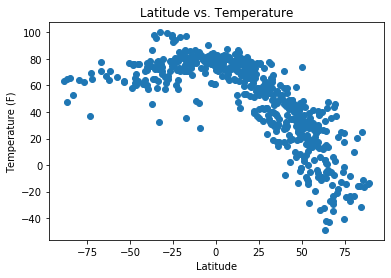

In [9]:
plt.scatter(city_data["Latitude"], city_data["Temperature (F)"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.show()

#### Latitude vs. Humidity Plot

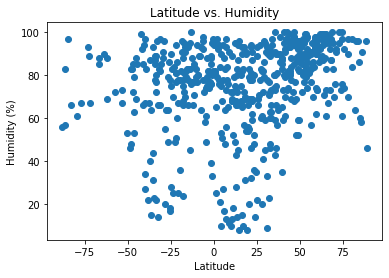

In [10]:
plt.scatter(city_data["Latitude"], city_data["Humidity (%)"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

#### Latitude vs. Cloudiness Plot

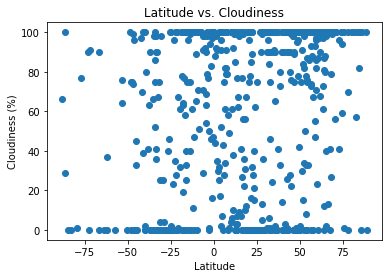

In [11]:
plt.scatter(city_data["Latitude"], city_data["Cloudiness (%)"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

#### Latitude vs. Wind Speed Plot

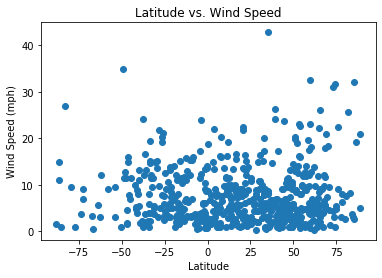

In [12]:
plt.scatter(city_data["Latitude"], city_data["Wind Speed (mph)"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()

## Linear Regression

In [13]:
# Create empty lists
n_hem_lats = []
n_hem_temp = []
n_hem_hum = []
n_hem_clouds = []
n_hem_wspeed = []
s_hem_lats = []
s_hem_temp = []
s_hem_hum = []
s_hem_clouds = []
s_hem_wspeed = []


# Loop through dataframe, find latitudes for each hemisphere and append corresponding values to lists        
for index, row in city_data.iterrows():
    if row["Latitude"] >= 0:
        n_hem_lats.append(row["Latitude"])
        n_hem_temp.append(row["Temperature (F)"])
        n_hem_hum.append(row["Humidity (%)"])
        n_hem_clouds.append(row["Cloudiness (%)"])
        n_hem_wspeed.append(row["Wind Speed (mph)"])
        
    elif row["Latitude"] < 0:
        s_hem_lats.append(row["Latitude"])
        s_hem_temp.append(row["Temperature (F)"])
        s_hem_hum.append(row["Humidity (%)"])
        s_hem_clouds.append(row["Cloudiness (%)"])
        s_hem_wspeed.append(row["Wind Speed (mph)"])

# Chech how many datapoints we have for each hemisphere        
print(len(n_hem_lats))
print(len(s_hem_lats))

373
178


In [14]:
# Create Northern and Southern Hemisphere DataFrames
n_hem_df = pd.DataFrame({"Latitude": n_hem_lats,
                         "Temperature": n_hem_temp,
                         "Humidity": n_hem_hum,
                         "Cloudiness": n_hem_clouds,
                         "Wind Speed": n_hem_wspeed})

s_hem_df = pd.DataFrame({"Latitude": s_hem_lats,
                         "Temperature": s_hem_temp,
                         "Humidity": s_hem_hum,
                         "Cloudiness": s_hem_clouds,
                         "Wind Speed": s_hem_wspeed})

In [15]:
# Create a function to create Linear Regression plots
def linregress_plot(x_values, y_values, y_label, title, filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="r")
    
    # Set locations for line equation
    x= 1.10 * (max((x_values) + min(x_values)) / 2)
    y= max((y_values) + min(y_values)) / 2
    plt.annotate(line_eq,(x,y),fontsize=15,color="r")
    
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.savefig("../Output/" + filename)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

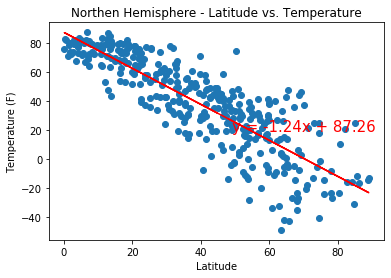

In [16]:
x_values = n_hem_df["Latitude"]
y_values = n_hem_df["Temperature"]
linregress_plot(x_values, y_values, "Temperature (F)", "Northen Hemisphere - Latitude vs. Temperature",
                "Nor_Hemi_Lat_Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

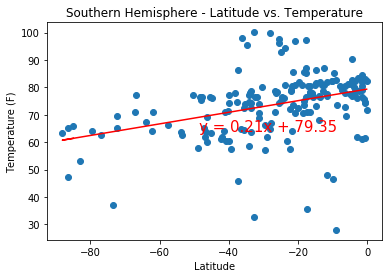

In [17]:
x_values = s_hem_df["Latitude"]
y_values = s_hem_df["Temperature"]
linregress_plot(x_values, y_values, "Temperature (F)", "Southern Hemisphere - Latitude vs. Temperature",
                "Sou_Hemi_Lat_Temp")

## ANALYSIS - Latitude vs. Temperature: 
On the northern hemisphere a strong negative linear relationship is observed: when latitute increases, temperature decreases.
On the southern hemisphere this is inversed: when latitude increases, temperature increases as well. However, the slope of the regression line for the southern hemisphere is much smaller than the regression line of the northern hemisphere. This means that latitude has a greater effect on temperature on the northern hemisphere than on the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

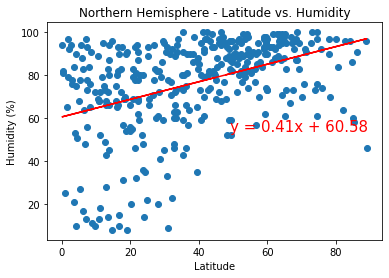

In [18]:
x_values = n_hem_df["Latitude"]
y_values = n_hem_df["Humidity"]
linregress_plot(x_values, y_values, "Humidity (%)", "Northern Hemisphere - Latitude vs. Humidity",
                "Nor_Hemi_Lat_Hum")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

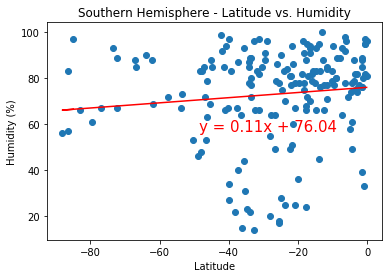

In [19]:
x_values = s_hem_df["Latitude"]
y_values = s_hem_df["Humidity"]
linregress_plot(x_values, y_values, "Humidity (%)", "Southern Hemisphere - Latitude vs. Humidity",
                "Sou_Hemi_Lat_Hum")

## ANALYSIS - Latitude vs. Humidity: 
On the northern hemisphere a modest positive linear relationship is observed: when latitude increases, humidity on average increases as well.
On the southern hemisphere this relationship is much smaller: the slope of regression line is close to 0. These results indicate that latitude has some effect on humidity, but mostly on the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

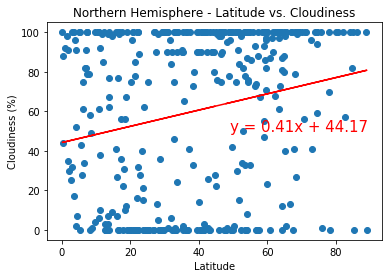

In [20]:
x_values = n_hem_df["Latitude"]
y_values = n_hem_df["Cloudiness"]
linregress_plot(x_values, y_values, "Cloudiness (%)", "Northern Hemisphere - Latitude vs. Cloudiness",
                "Nor_Hemi_Lat_Clouds")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

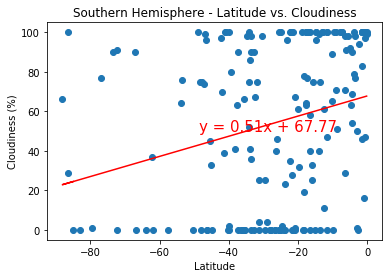

In [21]:
x_values = s_hem_df["Latitude"]
y_values = s_hem_df["Cloudiness"]
linregress_plot(x_values, y_values, "Cloudiness (%)", "Southern Hemisphere - Latitude vs. Cloudiness",
                "Sou_Hemi_Lat_Clouds")

# ANALYSIS - Latitude vs. Cloudiness: 
On both the northern and southern hemisphere a modest positive linear relationship is observed: when latitude increases, cloudiness on average increases as well. This relationship is strongest on the southern hemisphere: the slope of the regression line is 0.51 compared to 0.41 for the northern hemisphere. These results indicate that latitude has some effect on cloudiness on both hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

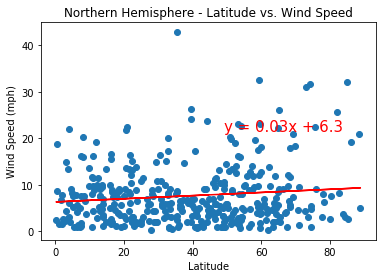

In [22]:
x_values = n_hem_df["Latitude"]
y_values = n_hem_df["Wind Speed"]
linregress_plot(x_values, y_values, "Wind Speed (mph)", "Northern Hemisphere - Latitude vs. Wind Speed",
                "Nor_Hemi_Lat_Wspeed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

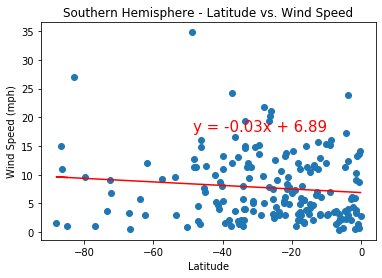

In [23]:
x_values = s_hem_df["Latitude"]
y_values = s_hem_df["Wind Speed"]
linregress_plot(x_values, y_values, "Wind Speed (mph)", "Southern Hemisphere - Latitude vs. Wind Speed",
                "Sou_Hemi_Lat_Wspeed")


## ANALYSIS - Latitude vs. Wind Speed: 
For both the northern and the southern hemisphere the slope of the regression line is nearly 0. This means that the effect of latitude on wind speed is neglible, and no meaningful linear relationship can be observed.